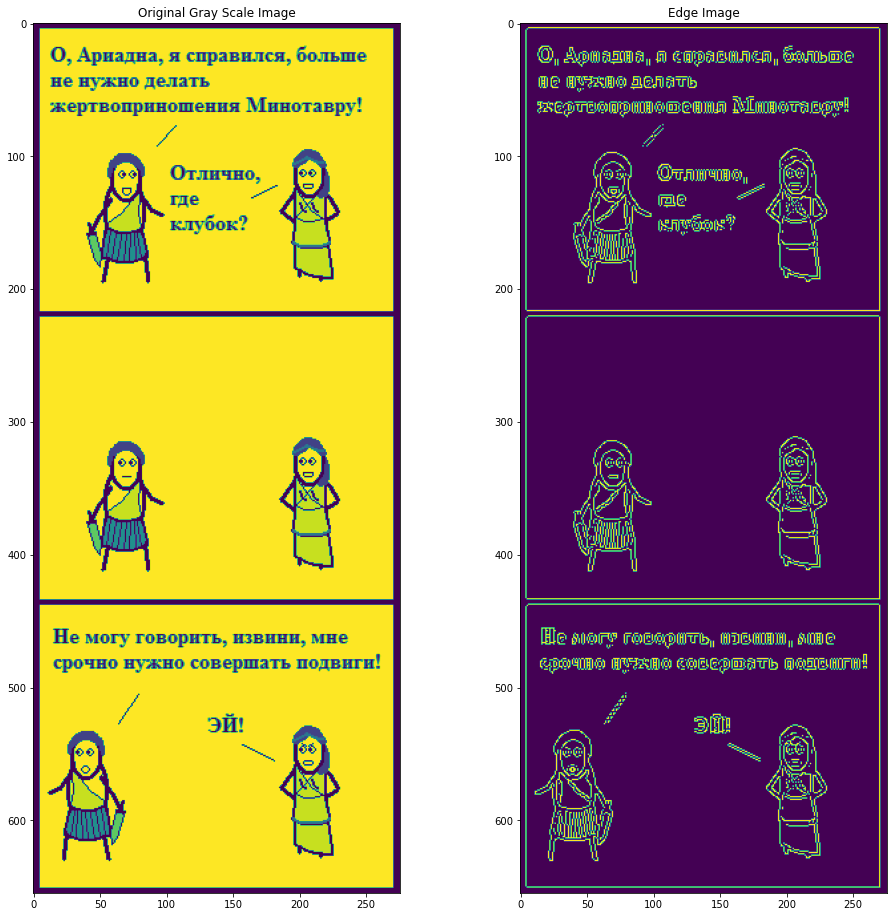

In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Declaring the output graph's size
plt.figure(figsize=(16, 16))

# Convert image to grayscale
img_gs = cv2.imread('labyrinthpun.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('gs.jpg', img_gs)

# Apply canny edge detector algorithm on the image to find edges
edges = cv2.Canny(img_gs, 100,200)

# Plot the original image against the edges
plt.subplot(121), plt.imshow(img_gs)
plt.title('Original Gray Scale Image')
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image')
# Display the two images
plt.show()

In [116]:
print(edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [117]:
print(edges[len(edges)//2])
coor = set()
h,w = edges.shape
for i in range(0, h):
    for j in range(0, w):
        if edges[i][j] == 255:
            point = (i,j)
            coor.add(point)
print(coor)

[  0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 255   0   0   0   0   0 255   0   0   0   0 255 255   0   0   0   0
   0   0 255 255   0   0 255   0   0   0   0 255   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255   0   0
 255   0   0 255   0   0 255 255   0   0 255   0   0 255 255   0   0   0
 255   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [118]:
transitions = [(-1,0), (-1,+1),(0,+1),(+1,+1),(+1,0),(+1,-1),(0,-1),(-1,-1)]
all_obj_coor = set()
start_x = -1
start_y = -1
def move(x,y):
    global transitions
    global all_obj_coor
    global start_x
    global start_y
    for i in range(0,8):
        tc_coor_x = x+transitions[i][0]
        tc_coor_y = y+transitions[i][1]
        tc_coor = (tc_coor_x,tc_coor_y)
        if tc_coor in coor:
            x = tc_coor_x
            y = tc_coor_y
            all_obj_coor.add(tc_coor)
            coor.remove(tc_coor)
            move(x,y)
    if x == start_x and y == start_y:
        return all_obj_coor

In [119]:
while len(coor)!=0:
    x,y = coor.pop()
    start_x = x
    start_y = y
    all_obj_coor = set()
    move(x,y)
    min_x = 10000000
    max_x = -1
    min_y = 10000000
    max_y = -1
    for point in all_obj_coor:
        super_tec_x = point[0]
        super_tec_y = point[1]
        if super_tec_x < min_x:
            min_x = super_tec_x
        if super_tec_x>max_x:
            max_x = super_tec_x
        if super_tec_y < min_y:
            min_y = super_tec_y
        if super_tec_y>max_y:
            max_y = super_tec_y
    if max_y-min_y >= 150 or max_x - min_x >=150:
        continue
    elif max_x-min_x <= 50:
        continue
    else:
        print(all_obj_coor)
        sr_x = (max_x+min_x)//2
        sr_y = (max_y+min_y)//2
        centre = (sr_x,sr_y)
        print(centre)
        q = []
        q.append(centre)
        kx, ky = centre
        edges[kx][ky] = 150
        '''while len(q)!=0:
            v = q.pop(0)
            for i in range(0,8,2):
                x_new = v[0]+transitions[i][0]
                y_new = v[1]+transitions[i][1]
                point = (x_new, y_new)
                print(point)
                if point not in all_obj_coor:
                    edges[point[0]][point[1]]=255
                    all_obj_coor.add(point)
                    q.append(point)'''

{(357, 84), (323, 82), (361, 84), (339, 81), (361, 93), (333, 56), (377, 83), (317, 78), (349, 85), (363, 84), (341, 81), (320, 58), (359, 96), (331, 58), (355, 89), (358, 51), (324, 83), (368, 83), (336, 57), (356, 90), (326, 56), (328, 83), (316, 63), (364, 82), (319, 59), (362, 94), (314, 72), (357, 52), (380, 84), (326, 83), (338, 57), (350, 86), (330, 83), (315, 64), (315, 73), (364, 84), (314, 65), (331, 81), (362, 96), (346, 54), (369, 83), (347, 83), (335, 81), (351, 53), (332, 82), (360, 98), (322, 81), (354, 88), (381, 84), (371, 83), (337, 81), (314, 67), (331, 83), (345, 82), (375, 83), (321, 57), (348, 53), (359, 84), (358, 94), (360, 91), (352, 87), (353, 52), (334, 57), (357, 86), (318, 79), (314, 69), (355, 52), (386, 85), (366, 82), (323, 56), (358, 87), (360, 84), (349, 84), (359, 95), (328, 55), (387, 86), (325, 56), (356, 89), (362, 84), (340, 81), (317, 61), (314, 71), (330, 55), (357, 51), (366, 84), (359, 88), (350, 85), (327, 83), (315, 63), (319, 79), (339, 57)

In [120]:
def coloring(x,y):
    global pixel_to_coloring
    pixel_to_coloring.add((x,y))
    for i in range(0,8):
        tc_coor_x = x+transitions[i][0]
        tc_coor_y = y+transitions[i][1]
        tc_coor = (tc_coor_x,tc_coor_y)
        if tc_coor not in all_obj_coor and tc_coor not in pixel_to_coloring:
            coloring(tc_coor_x, tc_coor_y)
        else:
            continue

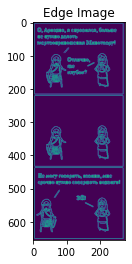

In [121]:
plt.subplot(122), plt.imshow(edges)
plt.title('Edge Image')
# Display the two images
plt.show()